In [40]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report,accuracy_score
%matplotlib inline

In [21]:
df= pd.read_csv("Desktop/creditcard.csv")

In [22]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

([<matplotlib.axis.XTick at 0x1ec31060490>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

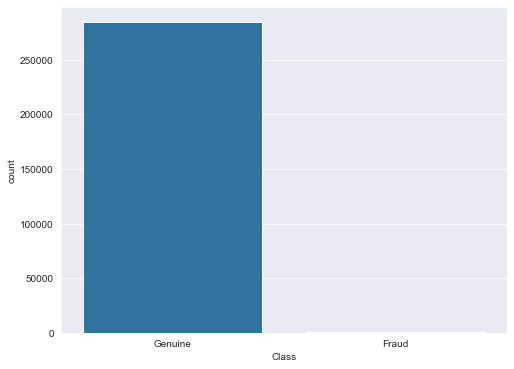

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [24]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Time in between the transactions: 
0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
Name: Time_hr, dtype: float64


Text(0, 0.5, '# transactions')

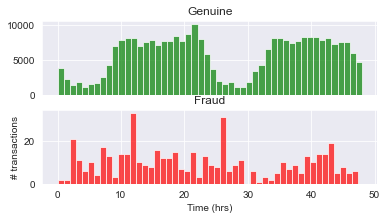

In [25]:
#plot Time to see if there is any trend

print("Time in between the transactions: ")
df['Time_hr'] = df['Time']/3600 # convert to hours
print(df['Time_hr'].head())
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_hr[df.Class==0],bins=50,color='g',alpha=0.7)
ax1.set_title('Genuine')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
ax2.hist(df.Time_hr[df.Class==1],bins=50,color='r',alpha=0.7)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [26]:
df = df.drop(['Time'],axis=1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class   Time_hr  
0 -0.189115  0.133558 -0.021053  149.62      0  0.000000  
1  0.125895 -0.008983  0.014724    2.69      0  0.000000  
2 -0.139097 -0.055353 -0.059752  378.66      0  0.000278  
3 -0.221929  0.062723  0.061458  123.50      0  0.000278  
4  0.502292  0.219422  0.215153   69.99      0  0.000556  

[5 rows x 31 columns]

In [27]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Time_hr')))
df = df.reindex(columns= cols)
df.head(10)

Time_hr        V1        V2        V3        V4        V5        V6  \
0  0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  0.000000  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  0.000278 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  0.000278 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4  0.000556 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5  0.000556 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6  0.001111  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7  0.001944 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8  0.001944 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9  0.002500 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5  0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6 -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7  1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8  0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9  0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  
5 -0.232794  0.105915  0.253844  0.081080    3.67      0  
6  0.750137 -0.257237  0.034507  0.005168    4.99      0  
7 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8  0.373205 -0.384157  0.011747  0.142404   93.20      0  
9 -0.069733  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

Text(0, 0.5, 'No. of transactions')

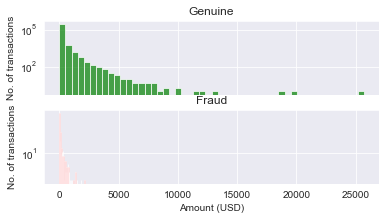

In [28]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.7)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('No. of transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.7)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount (USD)')
ax4.set_ylabel('No. of transactions')

In [29]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time_hr'].values.reshape(-1,1))
df = df.drop(['Amount', 'Time_hr'],axis=1)
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_Amount  scaled_time  
0 -0.189115  0.133558 -0.021053      0       0.244964    -1.996583  
1  0.125895 -0.008983  0.014724      0      -0.342475    -1.996583  
2 -0.139097 -0.055353 -0.059752      0       1.160686    -1.996562  
3 -0.221929  0.062723  0.061458      0       0.140534    -1.996562  
4  0.502292  0.219422  0.215153      0      -0.073403    -1.996541  

[5 rows x 31 columns]

In [30]:
scaled_amount = df['scaled_Amount']
scaled_time = df['scaled_time']

df.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_Amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

scaled_Amount  scaled_time        V1        V2        V3        V4  \
0       0.244964    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.342475    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       1.160686    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       0.140534    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4      -0.073403    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

In [31]:
def train_test_split(df, dropped_columns):
    df = df.drop(dropped_columns,axis=1)
    print(df.columns)
    
    from sklearn.model_selection import train_test_split
    
    y = df['Class']  #Labels
    X = df.drop(['Class'],axis= 1) #Variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 101)

    print("train set size: ", len(y_train), "\n test set size: ", len(y_test))
    print("fraud transactions in test set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [32]:
def model_predictions(classifier, X_train, y_train, X_test):
    # create classifier
    classifier = classifier
    
    # fit it to training data
    classifier.fit(X_train,y_train)
    
    # predict using test data
    y_pred = classifier.predict(X_test)
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = classifier.predict_proba(X_test)
    
    return y_pred, y_pred_prob

In [38]:
def print_metrics(y_test,y_pred,y_pred_prob):
    #print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    #print('Classification Report:\n', classification_report(y_test, y_pred))
    #print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))
    print('Accuracy ',accuracy_score(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 

In [34]:
fraud_class_len = len(df[df['Class'] == 1])
print(fraud_class_len)

genuine_indices = df[df['Class'] == 0].index
print(genuine_indices)

# taking random 492 samples from the genuine class
random_genuine_samples = np.random.choice(genuine_indices, fraud_class_len, replace=False)
print(len(random_genuine_samples))

fraud_indices = df[df['Class'] == 1].index
print(fraud_indices)

492
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)
492
Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [35]:
undersample_indices = np.concatenate([random_genuine_samples,fraud_indices])
undersample_df = df.loc[undersample_indices]
undersample_df.head()

scaled_Amount  scaled_time        V1        V2        V3        V4  \
42764       -0.264192    -1.128260  1.260324 -0.480037  0.431408 -1.266509   
247637      -0.313249     1.238820 -1.845244  1.572338 -2.060159 -1.635080   
223099      -0.313289     1.019859 -0.072474 -0.085348  1.150238 -1.851332   
11107       -0.083918    -1.592418 -3.255355 -2.890061  0.555962  0.615078   
27060       -0.063768    -1.272864 -0.612163  0.563495  1.217134 -0.070712   

              V5        V6        V7        V8  ...       V20       V21  \
42764  -1.114446 -1.171178 -0.326584 -0.151157  ... -0.087316 -0.022108   
247637  1.966092  3.565934 -0.691358  1.993360  ... -0.482236  0.423789   
223099 -1.133129  0.101111 -1.127033  0.579403  ... -0.004615  0.504135   
11107   2.384391 -2.322521 -1.357616  0.540581  ...  0.858472  0.007394   
27060   0.951291 -0.315022  1.265127 -0.175286  ...  0.110172 -0.340819   

             V22       V23       V24       V25       V26       V27       V28  \
42764   0.118865 -0.085131  0.433060  0.518746  0.001398  0.017952  0.019082   
247637  0.666528 -0.190788  0.787364  0.130222  0.654332 -0.958125 -0.076900   
223099  1.410074 -0.107710 -0.662834 -0.515348 -0.121778  0.009500 -0.004469   
11107  -1.393609  0.113547 -0.542052 -0.257036 -0.000508 -0.128733 -0.604358   
27060  -1.155205  0.191606 -0.458284 -0.447024 -1.065774 -0.071773 -0.071176   

        Class  
42764       0  
247637      0  
223099      0  
11107       0  
27060       0  

[5 rows x 31 columns]

([<matplotlib.axis.XTick at 0x1ec33c00340>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

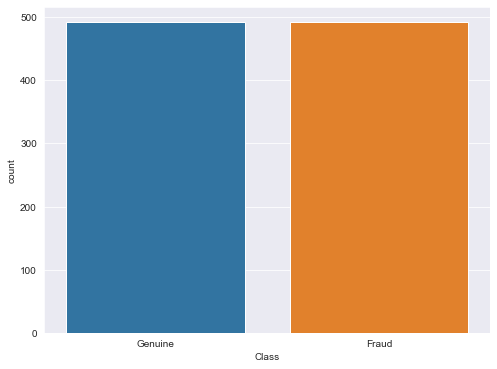

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= undersample_df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [41]:
from xgboost import XGBClassifier
dropped_columns = []
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
Accuracy  0.959349593495935
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.97      0.94      0.96       118

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

test-set confusion matrix:
 [[125   3]
 [  7 111]]


In [42]:
dropped_columns = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V10','V9','V8']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(undersample_df, dropped_columns)
new_y_pred, new_y_pred_prob = model_predictions(XGBClassifier(), new_X_train, new_y_train, new_X_test)
print_metrics(new_y_test,new_y_pred,new_y_pred_prob)

Index(['scaled_Amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train set size:  738 
 test set size:  246
fraud transactions in test set:  118
Accuracy  0.9552845528455285
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.97      0.93      0.95       118

    accuracy                           0.96       246
   macro avg       0.96      0.95      0.96       246
weighted avg       0.96      0.96      0.96       246

test-set confusion matrix:
 [[125   3]
 [  8 110]]
